Assignment 1 - Classification 

Question: You are provided with the customer details and payment history of the credit details.you should build a ml model classification to predict the default for credit

Default payment is the target variable

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
credit=pd.read_csv(r"D:\Studies\ML AI-ICT\Classification\credit_card_default.csv")

In [4]:
#Display dataframe

In [5]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
#Display summary

In [7]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_1                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [8]:
#All the columns are of numerical type - no categorical columns found 

In [9]:
credit.dtypes.value_counts()

int64    25
dtype: int64

In [10]:
credit.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.553667,0.518326,1.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [11]:
credit.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          3
AGE                              56
PAY_1                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

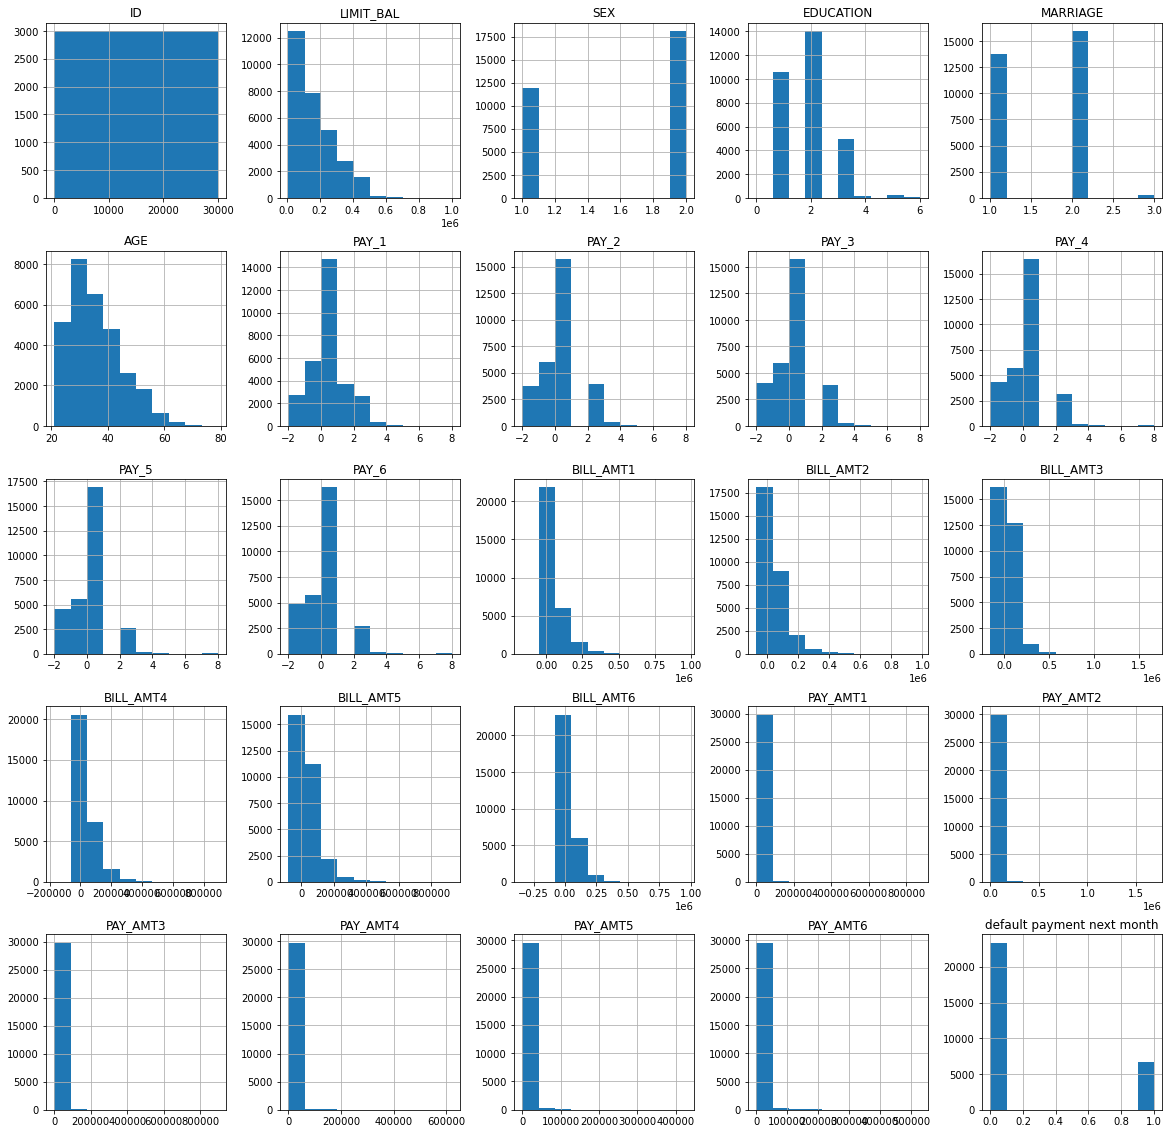

In [12]:
credit.hist(figsize=(20,20))
plt.show()

In [13]:
credit.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [14]:
#There are no missing values 

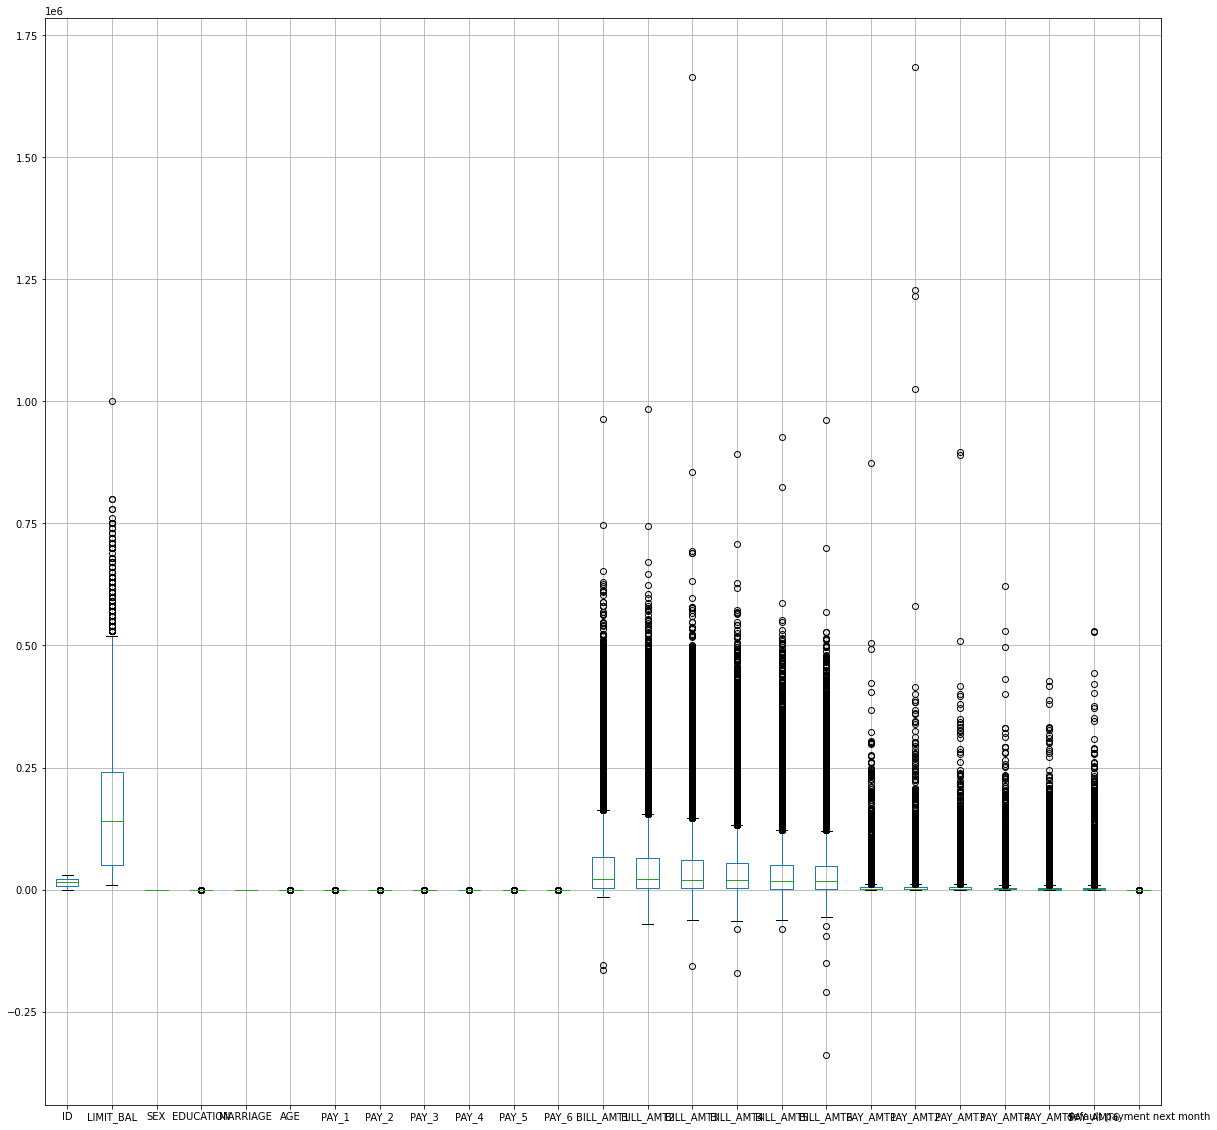

In [15]:
credit.boxplot(figsize=(20,20))
plt.show()

In [16]:
# THere are outliers in most of the columns

In [17]:
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

Distribution of  LIMIT_BAL with respect to defualt payment


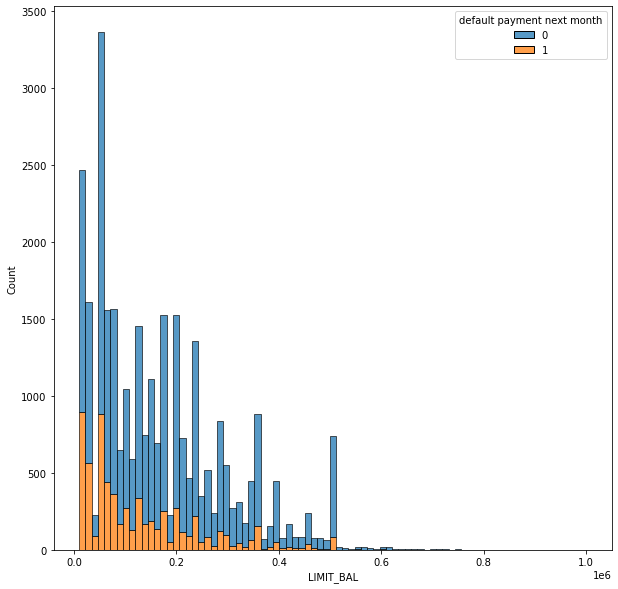

Distribution of  SEX with respect to defualt payment


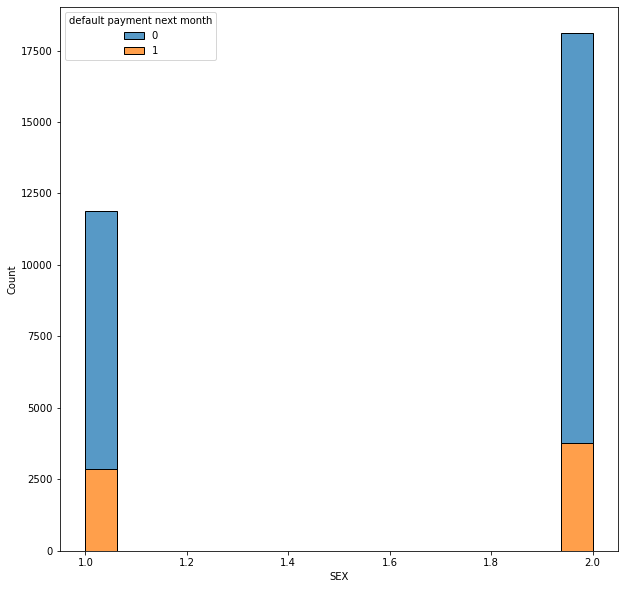

Distribution of  EDUCATION with respect to defualt payment


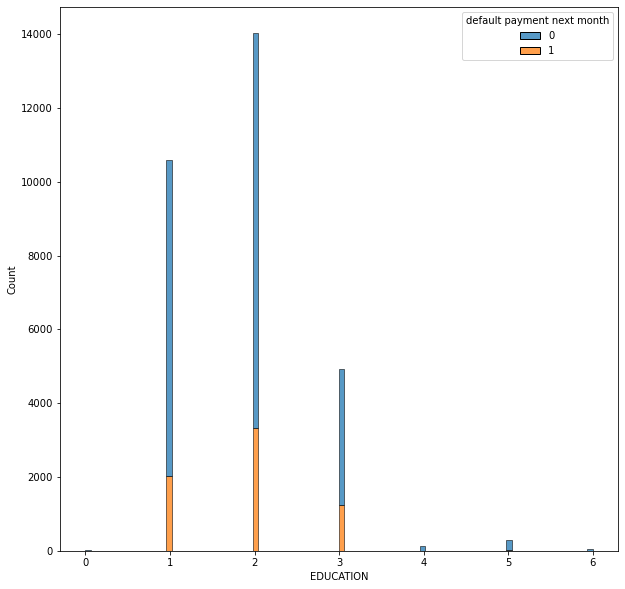

Distribution of  MARRIAGE with respect to defualt payment


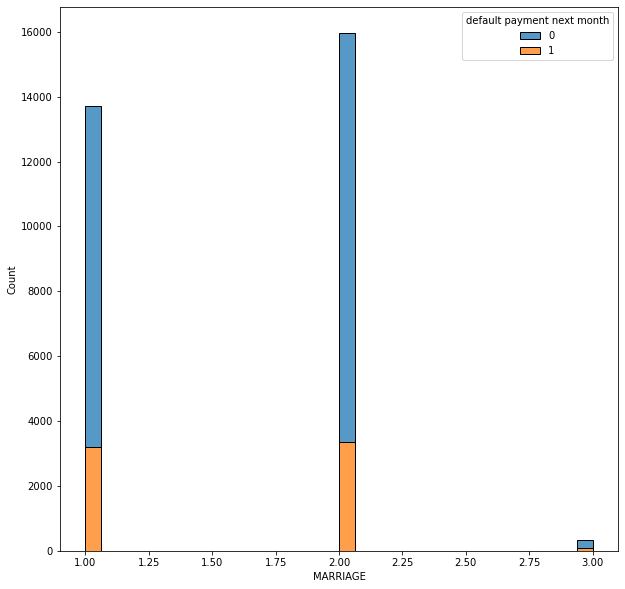

Distribution of  AGE with respect to defualt payment


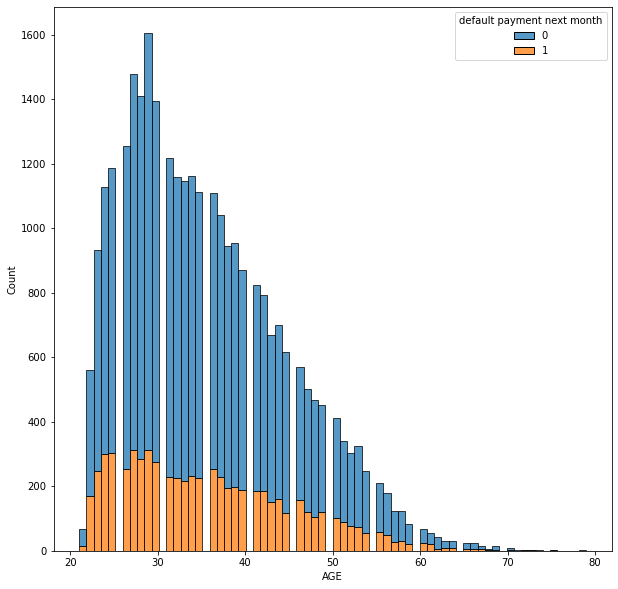

Distribution of  PAY_1 with respect to defualt payment


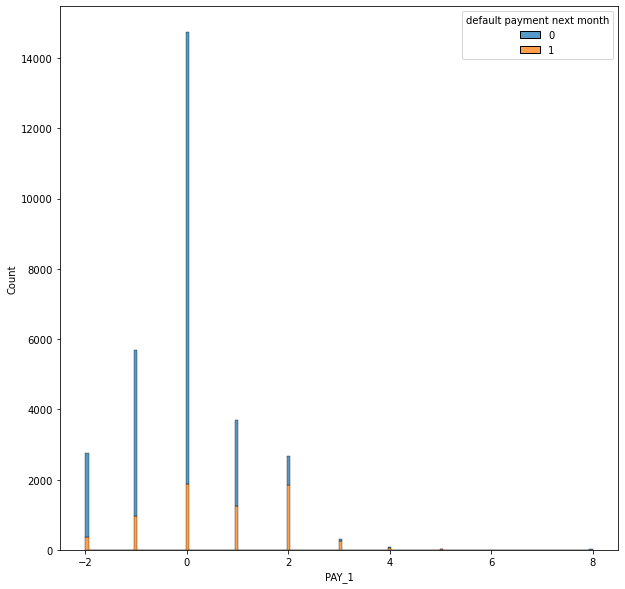

Distribution of  PAY_2 with respect to defualt payment


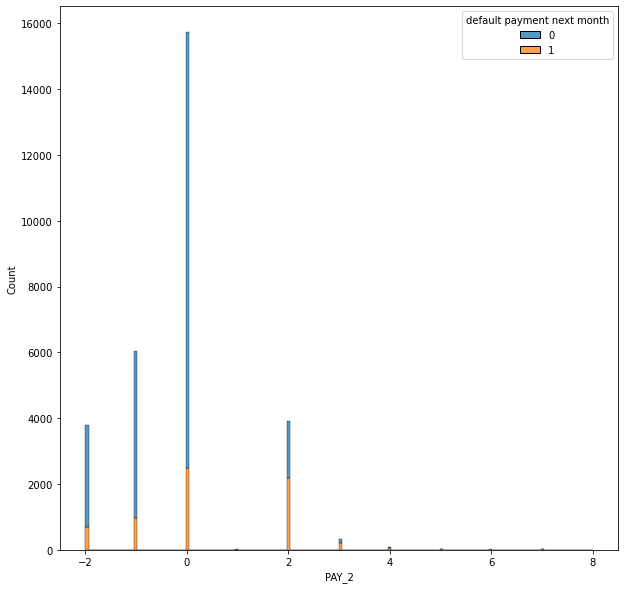

Distribution of  PAY_3 with respect to defualt payment


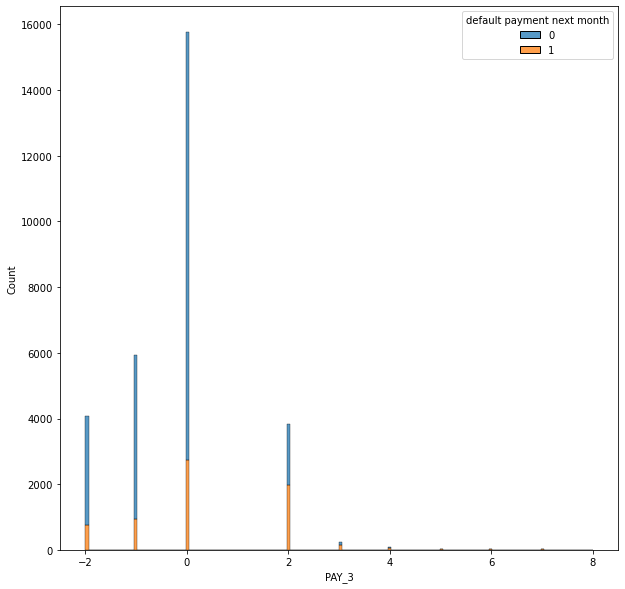

Distribution of  PAY_4 with respect to defualt payment


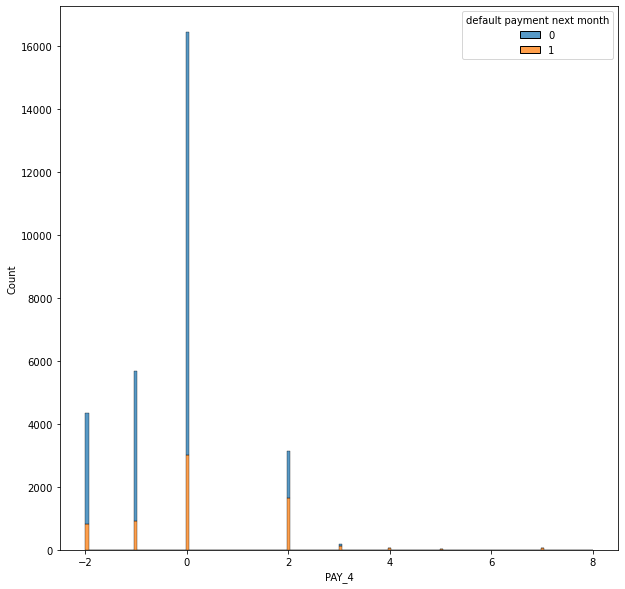

Distribution of  PAY_5 with respect to defualt payment


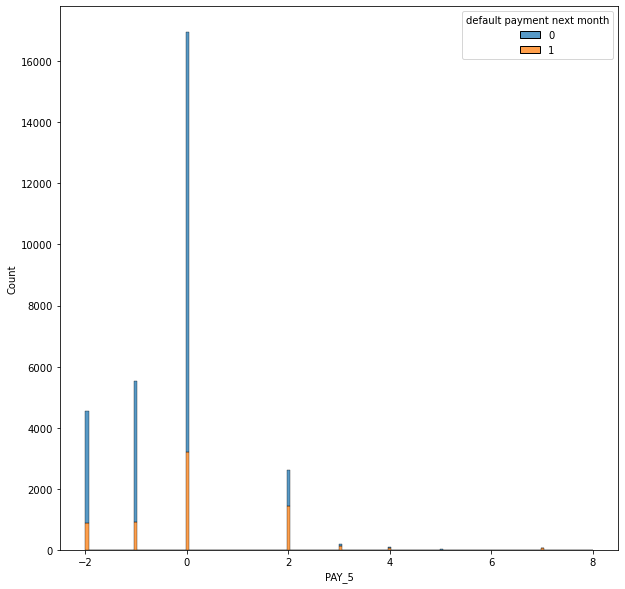

Distribution of  PAY_6 with respect to defualt payment


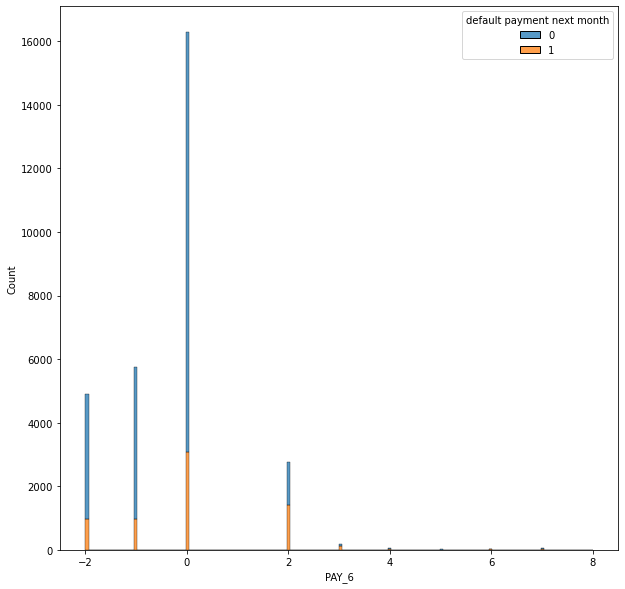

Distribution of  BILL_AMT1 with respect to defualt payment


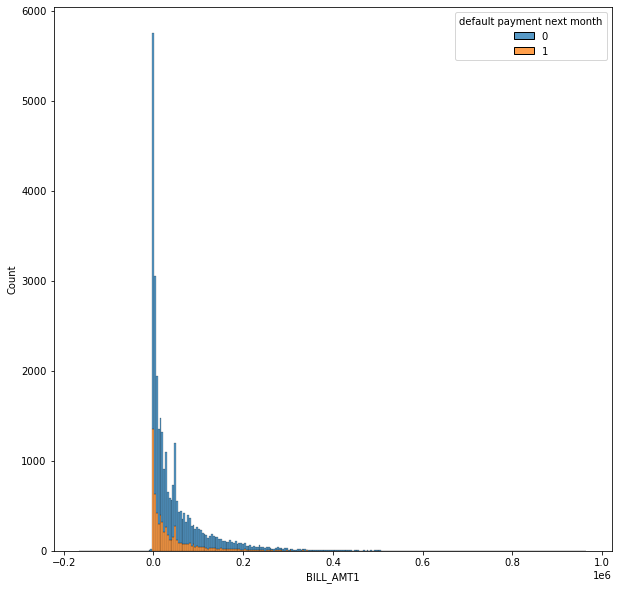

Distribution of  BILL_AMT2 with respect to defualt payment


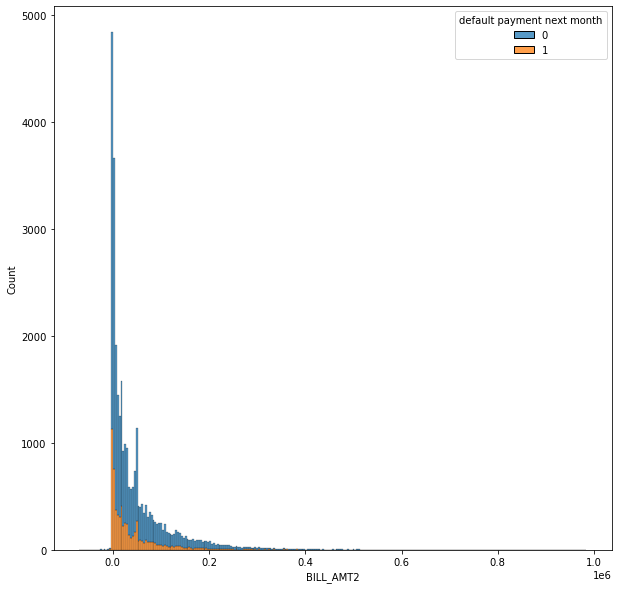

Distribution of  BILL_AMT3 with respect to defualt payment


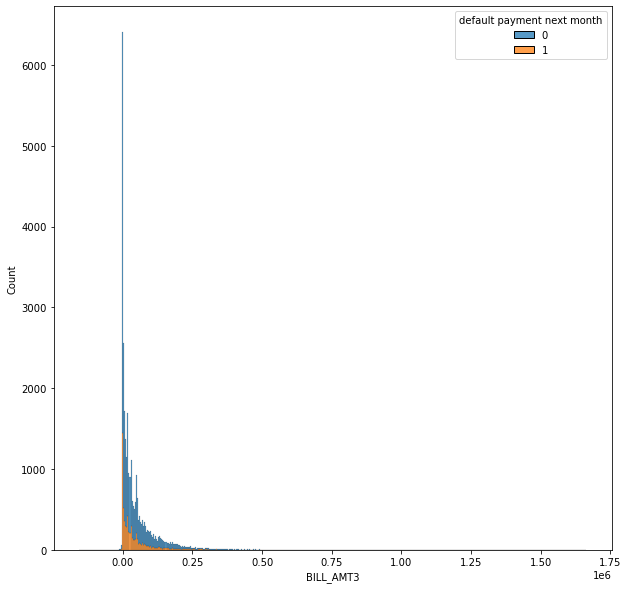

Distribution of  BILL_AMT4 with respect to defualt payment


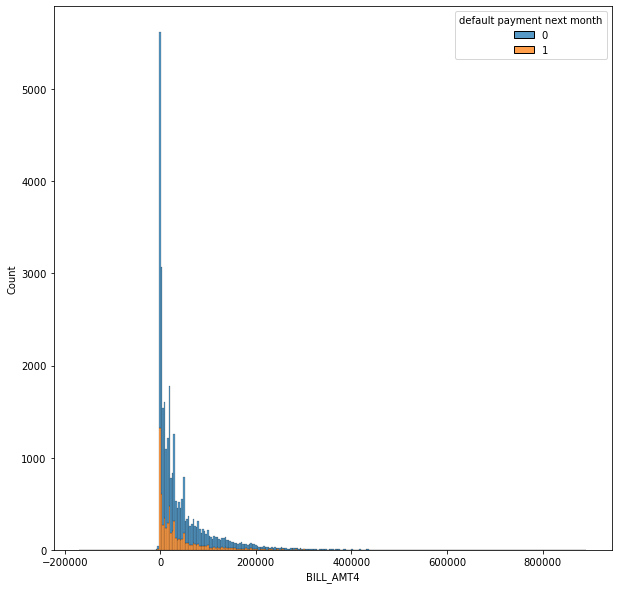

Distribution of  BILL_AMT5 with respect to defualt payment


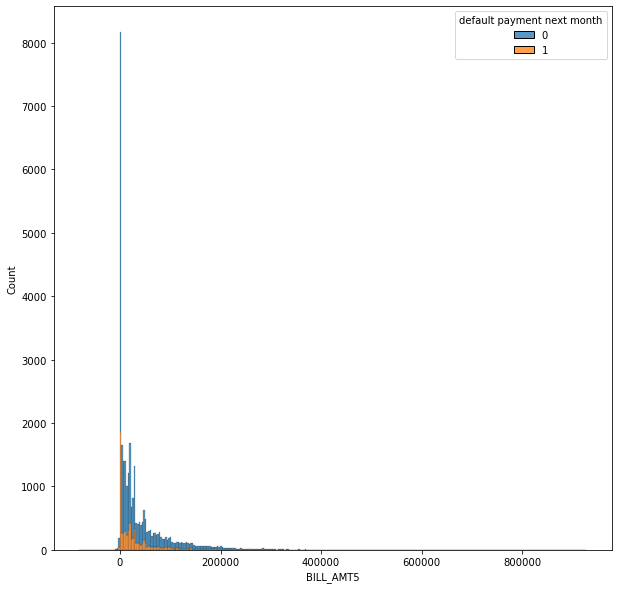

Distribution of  BILL_AMT6 with respect to defualt payment


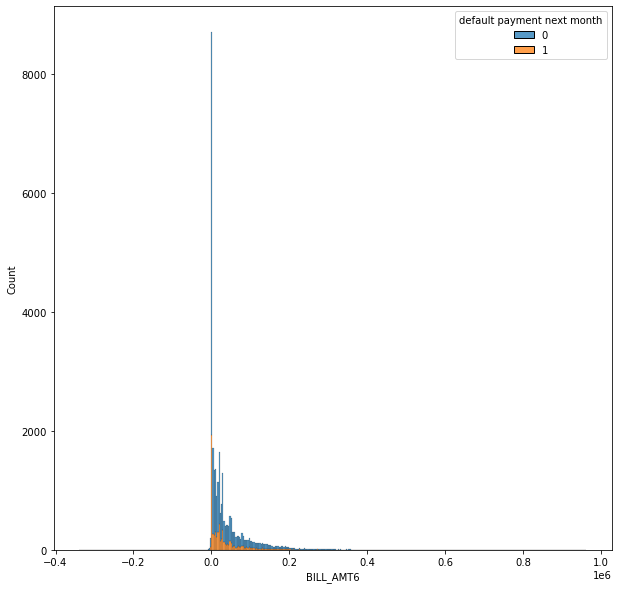

Distribution of  PAY_AMT1 with respect to defualt payment


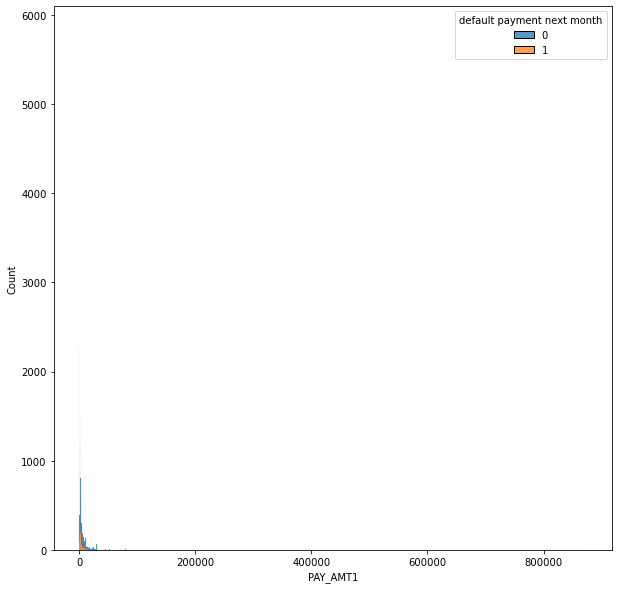

Distribution of  PAY_AMT2 with respect to defualt payment


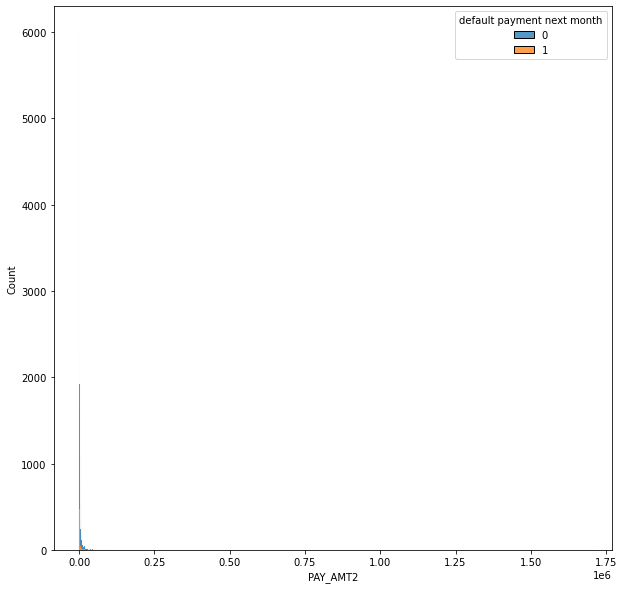

Distribution of  PAY_AMT3 with respect to defualt payment


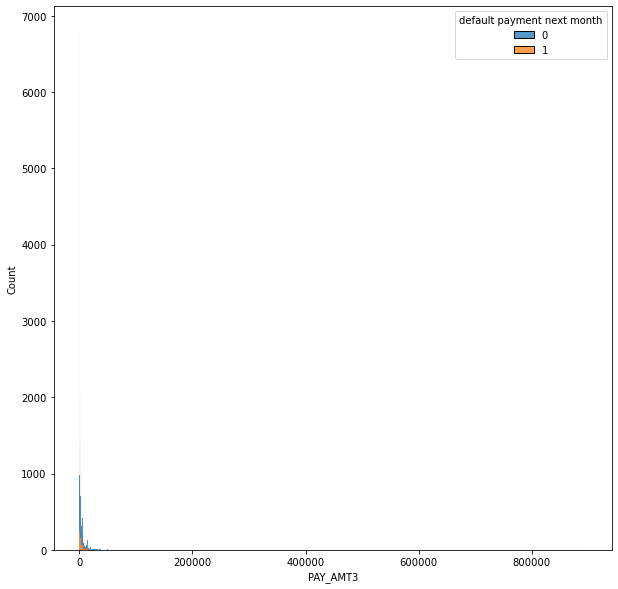

Distribution of  PAY_AMT4 with respect to defualt payment


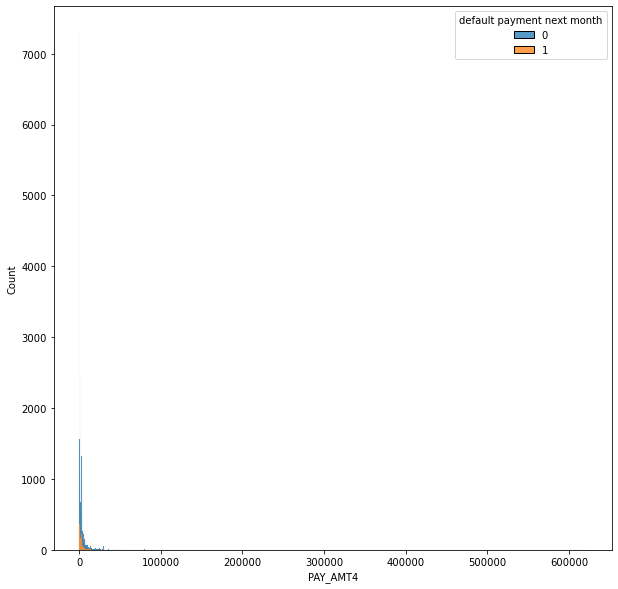

Distribution of  PAY_AMT5 with respect to defualt payment


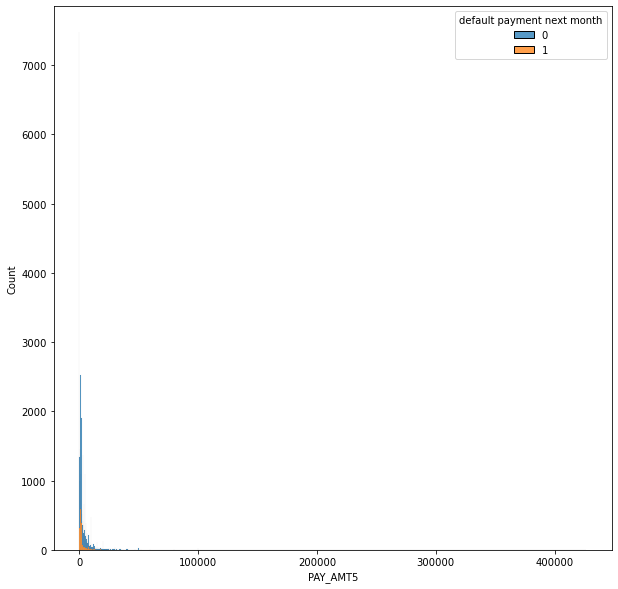

Distribution of  PAY_AMT6 with respect to defualt payment


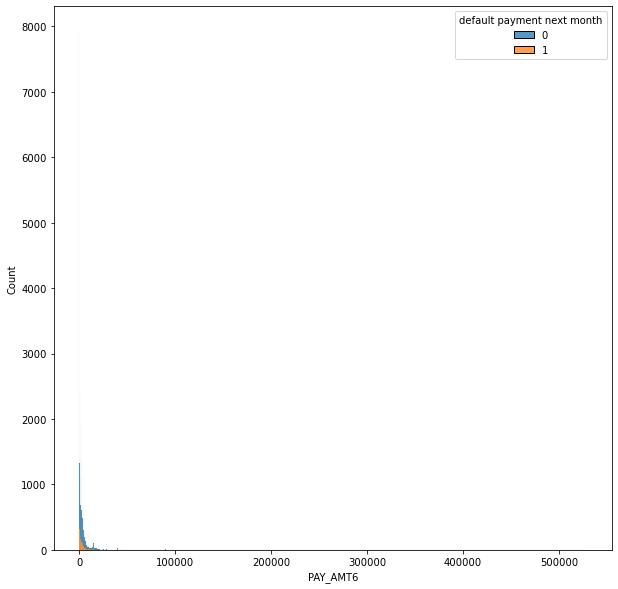

In [18]:
columns = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

for i in columns:
    plt.figure(figsize=(10, 10))
    sns.histplot(x=credit[i], hue=credit["default payment next month"], multiple="stack")
    print("Distribution of ",i ,"with respect to defualt payment")
    plt.show()

#Insights from EDA

1.Sex - 2 has more number of people and people are more for 0 with respect to target variable 

2.Education - 1,2,3 are more in number with 2 being the highest .

3.Marriage - 2 is highest follwed by 1 and then 3  

4.Age has a skewed distribution 

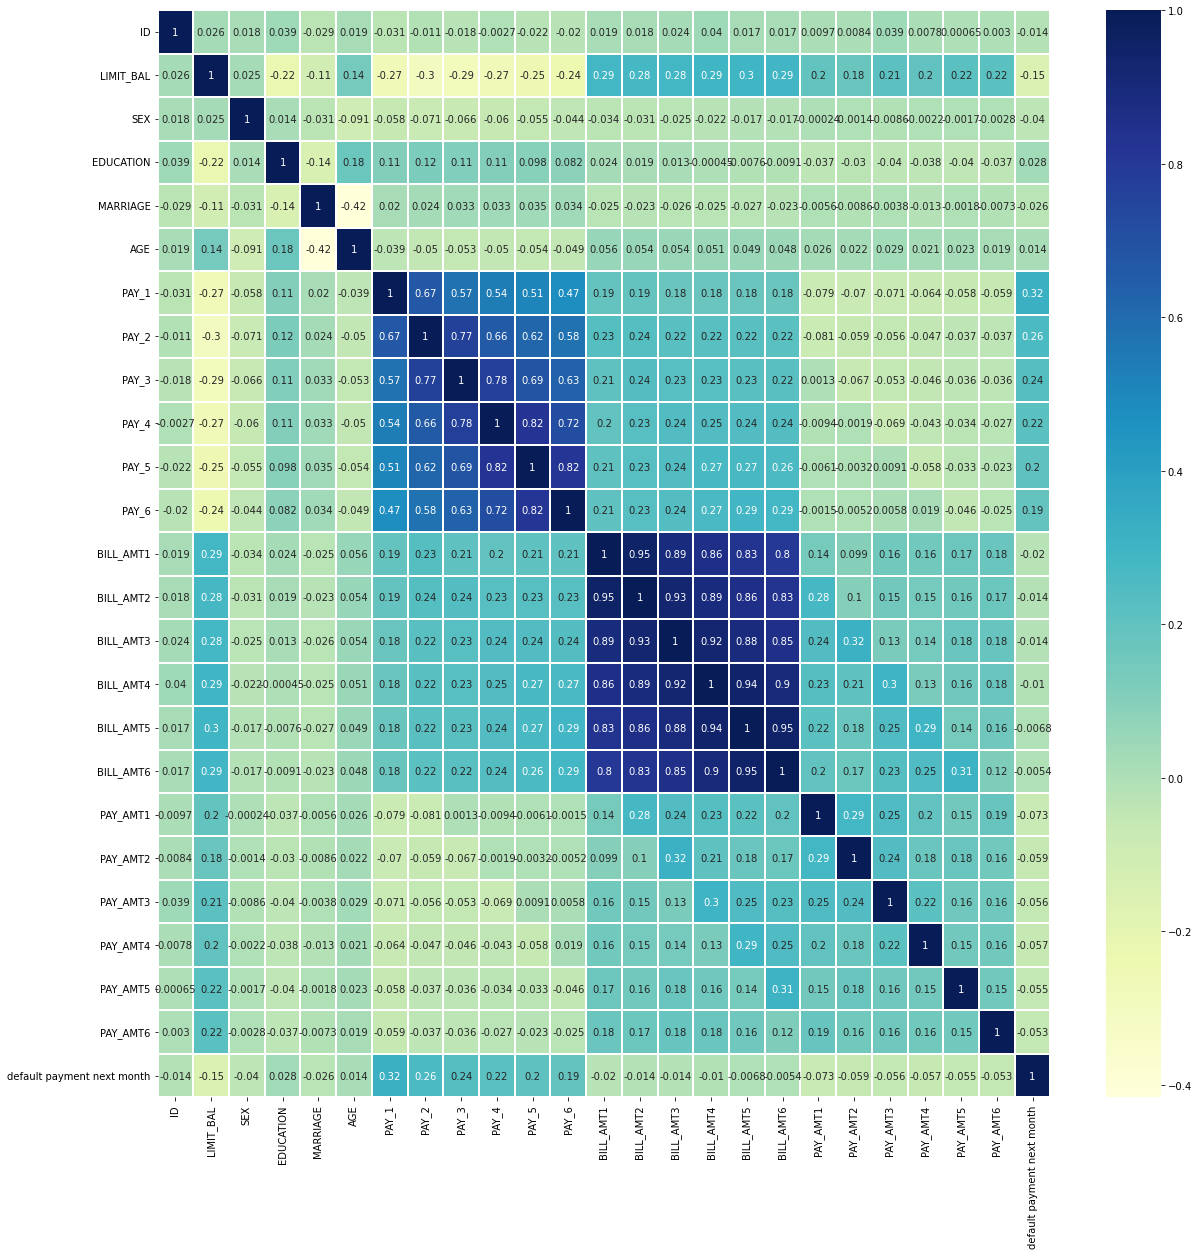

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(credit.corr(),annot=True,linewidths=0.1,cmap="YlGnBu")
plt.show()

In [20]:
# Here Pay 1-6 have high correlation with each other 
# Bill amt 1-6 have high correlation with each other 
# they can be removed 

In [21]:
X=credit.drop(['default payment next month'],axis=1)
y=credit['default payment next month']

In [22]:
#Since outliers are there using standard scalers to dela with extreme values

In [23]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X = SS.fit_transform(X)

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [26]:
def select_model(X, Y):

    best_models = {}
    model = [
        {   'name': 'Logistic Regression',
            'estimator': LogisticRegression(),
         
        },
        {   'name': 'Support Vector Machine',
            'estimator': SVC(),
         
        },
        {   'name': 'KNN',
            'estimator': KNeighborsClassifier(),
         
        },
                
    ]
    for model in model:
        cv_results=cross_val_score(model["estimator"],X,y,cv=5,scoring="accuracy")
        best_models[model['name']] = {'score': cv_results.mean(),'model':model['estimator']}
    return best_models

In [27]:
model = select_model(X,y)
model

{'Logistic Regression': {'score': 0.8097333333333335,
  'model': LogisticRegression()},
 'Support Vector Machine': {'score': 0.8185666666666667, 'model': SVC()},
 'KNN': {'score': 0.7913000000000001, 'model': KNeighborsClassifier()}}

In [28]:
#Here we can see that the SVM has higher value and this is better model 

In [29]:
#We will now find the Classification report for each algorithm

1.Logistic regression

In [30]:
log_model=LogisticRegression()
log_model.fit(X_train,y_train)

y_predict=log_model.predict(X_test)

In [31]:
print("Results from logistic regression are as below")
log_result = classification_report(y_predict,y_test,output_dict=True)
log_result = pd.DataFrame(log_result).transpose()
log_result.style.background_gradient(cmap="BuPu")


Results from logistic regression are as below


,precision,recall,f1-score,support
0,0.968500,0.820069,0.888126,6936.000000
1,0.232944,0.671986,0.345961,564.000000
accuracy,0.808933,0.808933,0.808933,0.808933
macro avg,0.600722,0.746028,0.617043,7500.000000
weighted avg,0.913186,0.808933,0.847355,7500.000000


In [32]:
print("Confusion Matrix \n" ,confusion_matrix(y_predict,y_test))

Confusion Matrix 
 [[5688 1248]
 [ 185  379]]


2.SVC

In [33]:
SV=SVC()
SV.fit(X_train,y_train)
y_pred=SV.predict(X_test)

In [34]:
print("Results from SVM are as below")
SVM_result = classification_report(y_pred,y_test,output_dict=True)
SVM_result = pd.DataFrame(SVM_result).transpose()
SVM_result.style.background_gradient(cmap="BuPu")

Results from SVM are as below


,precision,recall,f1-score,support
0,0.953686,0.835721,0.890815,6702.000000
1,0.323294,0.659148,0.433814,798.000000
accuracy,0.816933,0.816933,0.816933,0.816933
macro avg,0.638490,0.747434,0.662315,7500.000000
weighted avg,0.886613,0.816933,0.842190,7500.000000


In [35]:
print("Confusion Matrix \n" ,confusion_matrix(y_pred,y_test))

Confusion Matrix 
 [[5601 1101]
 [ 272  526]]


3.KNN

[0.7768, 0.7966666666666666, 0.7949333333333334, 0.8026666666666666, 0.8006666666666666, 0.8058666666666666, 0.8028, 0.8062666666666667, 0.806, 0.8081333333333334, 0.8081333333333334, 0.8074666666666667, 0.8076, 0.8084, 0.8084, 0.8081333333333334, 0.8082666666666667]


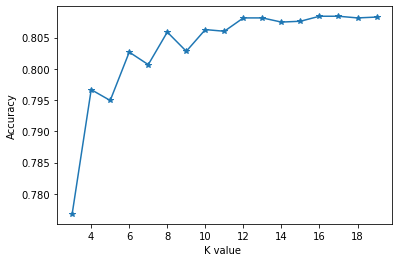

In [37]:
KNN_values=[]
neighbours=np.arange(3,20)
for k in neighbours:
    KNN=KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train,y_train)
    y_pred1=KNN.predict(X_test)
    acc=accuracy_score(y_test,y_pred1)
    KNN_values.append(acc)
print(KNN_values)   
plt.plot(neighbours,KNN_values,"*-")
plt.xlabel("K value ")
plt.ylabel("Accuracy")
plt.show()

In [43]:
#N=12 have better accuracy
KNN=KNeighborsClassifier(n_neighbors=12)
KNN.fit(X_train,y_train)
y_pred1=KNN.predict(X_test)

In [44]:
print("Results from KNN are as below")
KNN_result = classification_report(y_pred1,y_test,output_dict=True)
KNN_result = pd.DataFrame(KNN_result).transpose()
KNN_result.style.background_gradient(cmap="BuPu")


Results from KNN are as below


,precision,recall,f1-score,support
0,0.952835,0.828056,0.886074,6758.000000
1,0.285802,0.626685,0.392571,742.000000
accuracy,0.808133,0.808133,0.808133,0.808133
macro avg,0.619319,0.727370,0.639322,7500.000000
weighted avg,0.886843,0.808133,0.837250,7500.000000


In [45]:
print("Confusion Matrix \n" ,confusion_matrix(y_pred1,y_test))

Confusion Matrix 
 [[5596 1162]
 [ 277  465]]


In [46]:
dfc =pd.concat([log_result["f1-score"], SVM_result["f1-score"],KNN_result["f1-score"]],axis=1)
dfc.columns
df2 = dfc.set_axis(["log_result", "SVM_result","KNN_result"], axis=1, inplace=False)

In [47]:
df2.loc[["macro avg","accuracy"]].transpose().sort_values(by="macro avg",ascending=False).style.background_gradient(cmap="RdPu")

,macro avg,accuracy
SVM_result,0.662315,0.816933
KNN_result,0.639322,0.808133
log_result,0.617043,0.808933


SInce this is a imbalanced dataset, we need to use the macro F1 score as a metric and based on that we can say that SVC is a better model to predict than the other 2 models as it has a higher macro score than KNN and logistic models